# EDA

### Importación de librerías

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import folium # libreria de mapas
from folium.plugins import MarkerCluster # permite agrupar

### Importación de datos

In [62]:
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')

### Análisis preliminar de la base de datos

Se extrae una muestra aleatoria de la base y se consulta la información principal para ver cómo vienen los datos.

In [63]:
df.sample(10, random_state=1234)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
36514,29034190,The NYC Getaway Space,9808458,Zain,Bronx,Kingsbridge,40.87072,-73.89974,Private room,65,2,0,NaN,NaN,4,364
48599,36334813,Sunny Room in the heart of Williamsburg,17379828,Caterina,Brooklyn,Williamsburg,40.70906,-73.95544,Private room,75,3,0,NaN,NaN,1,7
34181,27110361,Artist's home in Williamsburg,8731758,Jeanne,Brooklyn,Williamsburg,40.71326,-73.96440,Entire home/apt,175,5,5,2019-05-23,0.46,1,198
21356,17013882,"Big bedroom in Astoria, 20 min from Central Park",7039858,Costas,Queens,Astoria,40.76882,-73.92793,Private room,65,3,23,2018-12-31,0.81,1,23
4887,3493833,Huge Artist Loft with BBQ deck - WILLIAMSBURG,17592620,Paul,Brooklyn,Williamsburg,40.71788,-73.96021,Entire home/apt,318,5,19,2019-06-01,0.32,1,268
42954,33362377,"Bright, Williamsburg bedroom with private balcony",4094038,Alex,Brooklyn,Williamsburg,40.71157,-73.94055,Private room,75,2,4,2019-06-04,2.11,4,0
43907,33937844,"Spacious, Light-Filled, Private Bklyn 2-Bedroom",255990804,Joel,Brooklyn,Crown Heights,40.66549,-73.94616,Entire home/apt,220,2,4,2019-06-05,2.03,1,251
16372,13162150,"Sunfilled, clean, MONTHly discount",4326776,Sabina,Queens,Woodside,40.74457,-73.90474,Private room,80,14,0,NaN,NaN,1,0
39504,30768969,Sunny & Big Room w/private toilet in Bushwick,192181166,Elisa,Brooklyn,Williamsburg,40.70891,-73.94268,Private room,72,3,0,NaN,NaN,2,0
22661,18340498,Private bedroom and bathroom near Prospect Park,33723491,Suzzanne,Brooklyn,Flatbush,40.65274,-73.95848,Private room,39,2,7,2017-09-29,0.27,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

La base de datos tiene 48.895 observaciones y 16 variables, de las cuales cuatro tienen valores nulos. Por ahora como no sabemos qué variables vamos a utilizar, no se realizará ningún tratamiento de los null.

También se observa que existen tres variables del tipo float64, 7 del tipo int 64 y 6 de tipo object. Como algunas variables se importaron en un tipo de dato incorrecto, antes de comenzar con el procesamiento de la base de datos se transformarán al tipo de datos más adecuado.

In [65]:
df=df.astype({'name':'str','host_name':'str','neighbourhood_group':'category','neighbourhood':'category','room_type':'category'})
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y/%m/%d")
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

A continuación se estudian algunas estadísticas resumen sobre las variables para tener una primer idea de la composición de las mismas. En primer lugar se comienza con las variables numéricas y luego se analizan las variables de otros tipos.

In [66]:
round(df.describe()) # Variables numéricas

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,19017143.0,67620011.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10983108.0,78610967.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9471945.0,7822033.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19677284.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152178.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


Del resumen anterior se resaltan dos aspectos que llaman la atención. En primer lugar, se observa que existen precios nulos, lo que estaría indicando que algunos alojamientos se estarían ofreciendo gratis y no es realista, señalando un posible error en el ingreso de los datos. Por otro lado, llama la atención el valor máximo de noches minimas para alquilar un alojamiento que alcanza a 1250 noches.

Se procede a estudiar estos dos puntos.

In [67]:
print('Los alojamientos con precio igual a 0 son ', len(df[df['price']==0]))
print('Los mismos se distribuyen de la siguiente manera:')
print('')
print('> Segun host')
print('')
print(df[df['price']==0].value_counts('host_id'))
print('')
print('> Segun área')
print('')
df[df['price']==0].value_counts('neighbourhood_group')

Los alojamientos con precio igual a 0 son  11
Los mismos se distribuyen de la siguiente manera:

> Segun host

host_id
86327101     3
101970559    2
1641537      1
8993084      1
10132166     1
13709292     1
15787004     1
131697576    1
dtype: int64

> Segun área



neighbourhood_group
Brooklyn         9
Bronx            1
Manhattan        1
Queens           0
Staten Island    0
dtype: int64

Los precios en 0 se refieren a 11 alojamientos de 8 host que se encuentran en los barrios de Brooklyn, Brox y Manhattan. Dado que estos valores representan una proporción pequeña de las observaciones, se procede a eliminarlos para que no influyan en el análisis. 

In [68]:
df=df[df['price']!=0]
round(df.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.0,48884.0,48884.0,48884.0,48884.0,48884.0,48884.0,38833.0,48884.0,48884.0
mean,19016793.0,67622035.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10984315.0,78616662.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,10.0,1.0,0.0,0.0,1.0,0.0
25%,9470548.0,7817310.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19675740.0,30792574.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152967.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


Se observa que luego de eliminar los valores en 0, el precio minimo es de 10 usd la noche.

Ahora resta analizar el caso de las noches minimas; para detectar si es un valor atípico se procede a realizar un gráfico de caja (boxcox) y un conteo de alogjamientos por rango de noches minimas.

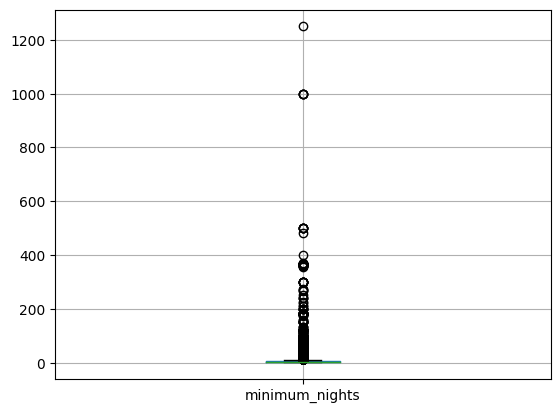

In [69]:
df.boxplot(column='minimum_nights')
plt.show()

In [70]:
df['minimum_nights'].value_counts(bins=5,sort=False)

(-0.25, 250.8]      48823
(250.8, 500.6]         56
(500.6, 750.4]          0
(750.4, 1000.2]         4
(1000.2, 1250.0]        1
Name: minimum_nights, dtype: int64

Considerando que solo 5 alojamientos de 48.895 exigen como estadía mínima más de 750 noches, se decide eliminarlos para evitar una interpretación sesgada.

In [71]:
df=df[df['minimum_nights']<750]
round(df.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0,38830.0,48879.0,48879.0
mean,19017363.0,67621210.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10984192.0,78616125.0,0.0,0.0,240.0,18.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,10.0,1.0,0.0,0.0,1.0,0.0
25%,9470616.0,7819574.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19675743.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29153034.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,500.0,629.0,58.0,327.0,365.0


Continuando con las estadísticas resumen, se presentan las de las variables que no son numéricas.

In [72]:
df.describe(include=['object','category','datetime64']) # Variables no numéricas

/tmp/ipykernel_2005/4267921096.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['object','category','datetime64']) # Variables no numéricas


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48879,48879,48879,48879,38830
unique,47891,11450,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23 00:00:00
freq,18,417,21656,3918,25404,1412
first,NaN,NaN,NaN,NaN,NaN,2011-03-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2019-07-08 00:00:00


In [73]:
print('Cantidad de hosts', df['host_id'].nunique())

Cantidad de hosts 37451


In [74]:
print('Tipos de alojamientos')
df['room_type'].value_counts(normalize=True)

Tipos de alojamientos


Entire home/apt    0.519732
Private room       0.456597
Shared room        0.023671
Name: room_type, dtype: float64

Si se considera que la fecha en que fue realizada la reseña es cercana a la que se se utilizó el alojamiento, entonces se puede decir que el período considerado se extiende desde el 28/03/2011 al 08/07/2019. En dicho período existían en la aplicación 37.457 host que ofrecían 48879 alojamientos, por lo que podemos intuir que algún host administra varios alojamientos. Se observa también que los alojamientos se ubicaban en 221 barrios que, a su vez, se agrupaban en 5 regiones. 

Con respecto a las características de los alojamientos se puede decir que existían tres tipos de 'espacios' ofrecidos, siendo el alojamiento entero el más ofrecido.

Considerando la cantidad de alojamientos que administran un host como una medida de importancia, interesa caracterizar el top 10 de host.

In [125]:
print('Top 10 de host segun cantidad de alojamientos')
top_10_host=df['host_id'].value_counts(sort=True).to_frame(name='Cantidad')[:10] # Top 10 host
top_10_host

Top 10 de host segun cantidad de alojamientos


,Cantidad
219517861,327
107434423,232
30283594,121
137358866,103
12243051,96
16098958,96
61391963,91
22541573,87
200380610,65
1475015,52


In [76]:
print('Peso acumulado del top 10 de host segun cantidad de alojamientos')
df['host_id'].value_counts(sort=True).cumsum().apply(lambda x: (x/48879)*100)[:10]

Peso acumulado del top 10 de host segun cantidad de alojamientos


219517861    0.668999
107434423    1.143640
30283594     1.391190
137358866    1.601915
12243051     1.798318
16098958     1.994722
61391963     2.180896
22541573     2.358886
200380610    2.491868
1475015      2.598253
Name: host_id, dtype: float64

In [77]:
print('Cantidad de alojamientos, total de reseñas y promedio de reseñas por alojamiento para el top 10 de host ')
#df.groupby('host_id')[['number_of_reviews','id']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean']}).sort_values(by=('number_of_reviews','mean'),ascending=False)[0:10] # Top 10 host
df.groupby('host_id')[['number_of_reviews','id']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean']}).sort_values(by=('id','nunique'),ascending=False)[0:10] # Top 10 host

Cantidad de alojamientos, total de reseñas y promedio de reseñas por alojamiento para el top 10 de host 


id number_of_reviews          
          nunique               sum      mean
host_id                                      
219517861     327              1281  3.917431
107434423     232                29  0.125000
30283594      121                65  0.537190
137358866     103                87  0.844660
12243051       96                43  0.447917
16098958       96               138  1.437500
61391963       91               417  4.582418
22541573       87                55  0.632184
200380610      65                 1  0.015385
7503643        52               242  4.653846

Se observa que el top 10 de host administra un 2.6 % del total de alojamientos ofrecidos en la aplicación en el período de referencia. A su vez, el host que administra mayor cantidad de alojamientos alcanza los 327 alojamientos y acumula un total de 1281 reviews (3.9 rewies por alojamiento en promedio).

Sería interesante hacer un análisis de sentimientos sobre las reseñas pero no se cuenta con el texto de la misma ni con la puntuación relacionada.

In [78]:
print('Área a la cual pertenecen los alojamientos del top 10 de host y precios medios asociados')
df_hn=round(df.groupby(['host_id','neighbourhood_group'])[['id','price']].agg({'id':pd.Series.nunique,'price':'mean'}).sort_values(by='id',ascending=False))[0:10] # Top 10 host
df_hn

Área a la cual pertenecen los alojamientos del top 10 de host y precios medios asociados


,,id,price
host_id,neighbourhood_group,,
219517861,Manhattan,327.0,253.0
107434423,Manhattan,230.0,303.0
30283594,Manhattan,121.0,278.0
16098958,Manhattan,96.0,209.0
12243051,Manhattan,96.0,213.0
61391963,Manhattan,91.0,146.0
22541573,Manhattan,86.0,216.0
137358866,Queens,79.0,44.0
200380610,Manhattan,65.0,290.0


Si se analiza la distribución por área de los alojamientos del top 10 de host, se obtiene a Mankattan como el área predominante, seguido por Queens y Brooklyn. Adicionalmente, considerenado el precio promedio de los alojamientos ofrecidos por cada host del top 10, se observa que en Manhattan el precio por noche es más caro y que el precio mayor es ofrecido por el host id 200380610.

In [136]:
table=df[['neighbourhood_group','host_id']].pivot_table(index='neighbourhood_group',columns='host_id',values='host_id',aggfunc= len, fill_value=0)[top_10_host.index]
#table

In [133]:
table_neig=table.apply(lambda x: x/sum(x),axis=0)
table_host=table.apply(lambda x: x/sum(x),axis=1)

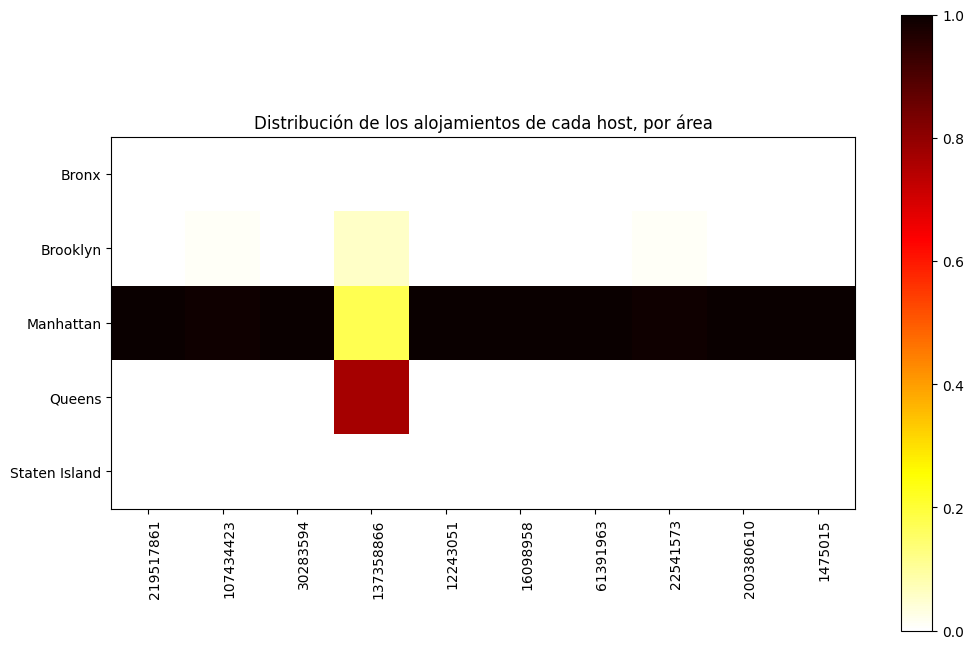

In [144]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(table_neig, cmap="hot_r")
ax.set_xticks(np.arange(table_neig.shape[1]))
ax.set_yticks(np.arange(table_neig.shape[0]))
ax.set_xticklabels(table_neig.columns.to_list())
ax.set_yticklabels(table_neig.index.to_list())
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.title('Distribución de los alojamientos de cada host, por área')
plt.colorbar(im)
plt.show()

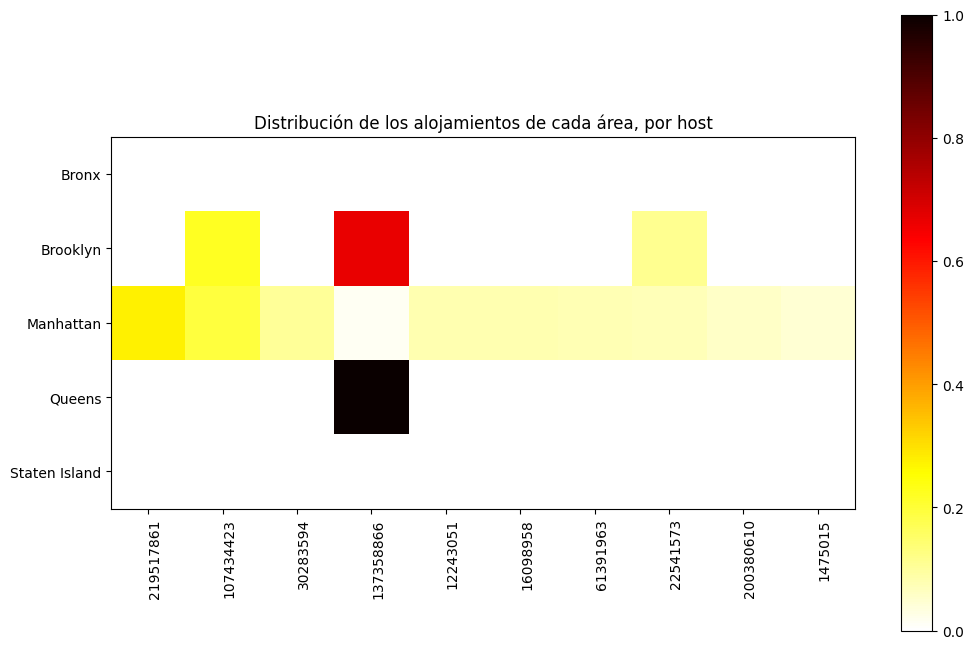

In [147]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(table_host, cmap="hot_r")
ax.set_xticks(np.arange(table_host.shape[1]))
ax.set_yticks(np.arange(table_host.shape[0]))
ax.set_xticklabels(table_host.columns.to_list())
ax.set_yticklabels(table_host.index.to_list())
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.colorbar(im)
plt.title('Distribución de los alojamientos de cada área, por host')
plt.show()

In [79]:
df_hn_filt=df[df['host_id'].isin(list(df_hn.reset_index()['host_id']))]
#df_hn_filt

In [80]:
print('Área y barrio al que pertenecen los alojamientos del top 10 de hosts y precios promedio por barrio')
pd.set_option('display.max_rows',110)
round(df_hn_filt.groupby(['host_id','neighbourhood_group','neighbourhood'])[['id','price']].agg({'id':pd.Series.nunique,'price':'mean'}).sort_values(by=['host_id','id'],ascending=False).dropna()) # Top 10 host

Área y barrio al que pertenecen los alojamientos del top 10 de hosts y precios promedio por barrio


id  price
host_id   neighbourhood_group neighbourhood                   
219517861 Manhattan           Financial District  218.0  265.0
                              Murray Hill          50.0  220.0
                              Theater District     27.0  287.0
                              Hell's Kitchen       15.0  186.0
                              Chelsea               7.0  252.0
                              Upper East Side       6.0  160.0
                              Midtown               4.0  200.0
200380610 Manhattan           Midtown              17.0  320.0
                              Upper East Side      10.0  239.0
                              Hell's Kitchen        9.0  318.0
                              Upper West Side       6.0  215.0
                              Chelsea               5.0  302.0
                              Murray Hill           5.0  305.0
                              Theater District      4.0  354.0
                              East Village          2.0  254.0
                              Gramercy              2.0  208.0
                              Kips Bay              2.0  198.0
                              West Village          2.0  336.0
                              Battery Park City     1.0  433.0
137358866 Queens              Woodside             35.0   49.0
                              Sunnyside            17.0   38.0
          Manhattan           Harlem               12.0   42.0
          Queens              Elmhurst             10.0   37.0
                              Astoria               9.0   49.0
          Brooklyn            Bushwick              6.0   42.0
          Manhattan           East Harlem           6.0   48.0
          Queens              Jackson Heights       4.0   32.0
                              Maspeth               3.0   49.0
                              Long Island City      1.0   44.0
107434423 Manhattan           Chelsea              37.0  311.0
                              Tribeca              30.0  304.0
                              Theater District     27.0  304.0
                              Financial District   25.0  263.0
                              Upper West Side      17.0  323.0
                              East Village         14.0  318.0
                              Kips Bay             14.0  282.0
                              West Village         14.0  354.0
                              Midtown              13.0  284.0
                              Hell's Kitchen       10.0  323.0
                              Upper East Side      10.0  275.0
                              Murray Hill           9.0  276.0
                              Battery Park City     2.0  248.0
                              Flatiron District     2.0  380.0
                              Nolita                2.0  315.0
          Brooklyn            DUMBO                 1.0  312.0
                              Williamsburg          1.0  278.0
          Manhattan           Gramercy              1.0  348.0
                              Lower East Side       1.0  314.0
                              NoHo                  1.0  306.0
                              SoHo                  1.0  466.0
61391963  Manhattan           Kips Bay             19.0  146.0
                              Midtown              19.0  146.0
                              Upper East Side      17.0  131.0
                              Hell's Kitchen       14.0  152.0
                              Murray Hill           7.0  166.0
                              Upper West Side       5.0  137.0
                              Greenwich Village     4.0  156.0
                              Little Italy          4.0  158.0
                              Chelsea               1.0  142.0
                              Nolita                1.0  142.0
30283594  Manhattan           Hell's Kitchen       41.0  277.0
                              Midtown              33.0  314.0
                     

A continuación se estudia la distribución de los alojamientos por área y barrio.

In [81]:
print('Cantidad de alojamientos por área')
#df['neighbourhood_group'].value_counts(sort=True,normalize=True)
df.groupby(['neighbourhood_group'])['id','price'].agg({'id':pd.Series.nunique,'price':'mean',}).sort_values(by='id',ascending=False)


Cantidad de alojamientos por área


/tmp/ipykernel_2005/3759347807.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['neighbourhood_group'])['id','price'].agg({'id':pd.Series.nunique,'price':'mean',}).sort_values(by='id',ascending=False)


,id,price
neighbourhood_group,,
Manhattan,21656,196.884836
Brooklyn,20094,124.441176
Queens,5666,99.517649
Bronx,1090,87.577064
Staten Island,373,114.812332


Se observa que Manhattan y Brooklyn acumulan el 85% de los alojamientos ofrecidos y el precio promedio por noche es mayor que en el resto de las áreas, seguramente sean las áreas más turísticas. A su vez, el área más barata para hospedarse es Bronx.

In [82]:
df_nei=df.groupby(['neighbourhood_group','neighbourhood']).agg({'price':'mean'}).sort_values(by=['neighbourhood_group','price'],ascending=False).dropna()
df_nei.reset_index(inplace=True)

In [83]:
print('Top 5 de barrios según precios promedio, divididos por área')
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].head(5))
    print('')

Top 5 de barrios según precios promedio, divididos por área


,neighbourhood_group,neighbourhood,price
0,Staten Island,Fort Wadsworth,800.0
1,Staten Island,Woodrow,700.0
2,Staten Island,Prince's Bay,409.5
3,Staten Island,Randall Manor,336.0
4,Staten Island,Willowbrook,249.0


,neighbourhood_group,neighbourhood,price
43,Queens,Neponsit,274.666667
44,Queens,Breezy Point,213.333333
45,Queens,Jamaica Estates,182.947368
46,Queens,Arverne,171.779221
47,Queens,Belle Harbor,171.500000


,neighbourhood_group,neighbourhood,price
94,Manhattan,Tribeca,490.638418
95,Manhattan,Battery Park City,367.086957
96,Manhattan,Flatiron District,341.925000
97,Manhattan,NoHo,295.717949
98,Manhattan,SoHo,287.103352


,neighbourhood_group,neighbourhood,price
126,Brooklyn,Sea Gate,487.857143
127,Brooklyn,Cobble Hill,211.929293
128,Brooklyn,Brooklyn Heights,209.064935
129,Brooklyn,DUMBO,196.305556
130,Brooklyn,Vinegar Hill,187.176471


,neighbourhood_group,neighbourhood,price
173,Bronx,Riverdale,442.090909
174,Bronx,City Island,173.000000
175,Bronx,Spuyten Duyvil,154.750000
176,Bronx,Eastchester,141.692308
177,Bronx,Unionport,137.142857


In [84]:
print('5 barrios con precios promedio más bajos, divididos por área')
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].tail(5))
    print('')

5 barrios con precios promedio más bajos, divididos por área


,neighbourhood_group,neighbourhood,price
38,Staten Island,Concord,58.192308
39,Staten Island,Grant City,57.666667
40,Staten Island,New Dorp Beach,57.400000
41,Staten Island,New Dorp,57.000000
42,Staten Island,Bull's Head,47.333333


,neighbourhood_group,neighbourhood,price
89,Queens,Ridgewood,77.184397
90,Queens,Rosedale,76.694915
91,Queens,Little Neck,75.200000
92,Queens,Woodhaven,67.170455
93,Queens,Corona,59.171875


,neighbourhood_group,neighbourhood,price
121,Manhattan,Morningside Heights,114.783237
122,Manhattan,Roosevelt Island,113.259740
123,Manhattan,Washington Heights,89.610679
124,Manhattan,Marble Hill,89.166667
125,Manhattan,Inwood,88.896825


,neighbourhood_group,neighbourhood,price
168,Brooklyn,Midwood,80.339450
169,Brooklyn,Gravesend,79.014706
170,Brooklyn,Brownsville,76.459016
171,Brooklyn,Bensonhurst,75.786667
172,Brooklyn,Borough Park,63.066176


,neighbourhood_group,neighbourhood,price
216,Bronx,Mount Eden,58.500000
217,Bronx,Bronxdale,57.105263
218,Bronx,Soundview,53.466667
219,Bronx,Tremont,51.545455
220,Bronx,Hunts Point,50.500000


Si se analiza la distribución de precios entre barrios de las dos áreas que concentran el mayor porcentaje de alojamientos, se obtiene que de Manhattan el barrio más caro es Tribeca y el más barato es Inwood, mientras que en Brooklyn el barrio más caro es Sea Gate y el más barato es Borough Park.

A continuación se estudia si éste comportamiento es regular durante todo el período, considerando como referencia la fecha de la reseña. Es importante aclarar que para realizar este análisis se utilizan solamente los alojamientos que tienen reseñas, por lo que existen 10.052 observaciones que se dejan de lado.

In [85]:
df_rev=df[df['last_review'].notna()]
df_rev.set_index('last_review',inplace=True)
df_rev.shape

(38830, 15)

In [88]:
print(df_rev.index.year.value_counts())

2019    25202
2018     6046
2017     3204
2016     2707
2015     1393
2014      198
2013       48
2012       25
2011        7
Name: last_review, dtype: int64


In [106]:
df_rev=df_rev[df_rev['neighbourhood_group'].isin(['Brooklyn','Manhattan'])]
tab=df_rev.groupby([df_rev.index.year,'neighbourhood_group'],observed=True)['price'].mean().reset_index('neighbourhood_group')
tab

,neighbourhood_group,price
last_review,,
2011,Brooklyn,188.600000
2011,Manhattan,100.000000
2012,Brooklyn,153.300000
2012,Manhattan,188.181818
2013,Brooklyn,126.909091
2013,Manhattan,365.615385
2014,Brooklyn,135.540230
2014,Manhattan,201.215909
2015,Brooklyn,125.914654


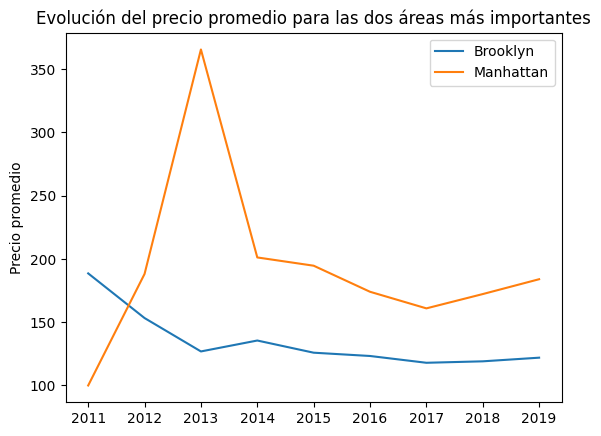

In [110]:
fig,ax=plt.subplots()
ax.plot(tab[tab['neighbourhood_group']=='Brooklyn'].index,tab[tab['neighbourhood_group']=='Brooklyn']['price'],label='Brooklyn')
ax.plot(tab[tab['neighbourhood_group']=='Manhattan'].index,tab[tab['neighbourhood_group']=='Manhattan']['price'],label='Manhattan')
ax.set_ylabel('Precio promedio')
ax.legend()
plt.title('Evolución del precio promedio para las dos áreas más importantes')
plt.show()

Exceptuando el año 2011, Manhattan parecería ser más caro que Brooklyn en promedio. Llama la atención el aumento en los precios de Manhattan en el 2013.

In [121]:
df[(df['neighbourhood_group']=='Manhattan')& (df['last_review'].dt.year==2013)].sort_values('price',ascending=False)[:5]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
419,141890,LUXURY SOHO 2 Bedroom Apt,689661,Allison,Manhattan,Nolita,40.72255,-73.99346,Entire home/apt,375,3,18,2013-10-01,0.21,1,0
798,285442,Huge room with private balcony,1475866,Jesper,Manhattan,East Village,40.73119,-73.98819,Private room,300,6,1,2013-05-06,0.01,1,0
613,231414,TURQUOISE: One-Bedroom Apt. in Soho,1184442,Roberto,Manhattan,SoHo,40.72599,-74.00168,Private room,270,5,1,2013-07-09,0.01,1,210
1429,641768,INSANE NYC views! Live in the sky!,3206521,Dee,Manhattan,Hell's Kitchen,40.76206,-73.99980,Entire home/apt,263,30,11,2013-03-08,0.13,2,33


El incremento en el precio promedio en 2013 se debe a que hay un apartamento cuyo precio es de 5000 dólares la noche que hace que el precio promedio se eleve. Es de resaltar que el siguiente precio más alto es de 375 dólares la noche.

Este caso requiere un mayor análisis pero sería necesario consultar a alguna persona que se especialice en el mercado y nos pueda indicar si realmente es un precio anormal o no.

Para finalizar se grafican los apartamentos del top 10 de host.

In [156]:
tab_map=df[df['host_id'].isin(top_10_host.index)]

In [163]:
map=folium.Map()
mc=MarkerCluster().add_to(map)
for i in range(len(tab_map)):
    lon=[j for j in tab_map['longitude']][i]
    lat=[j for j in tab_map['latitude']][i]
    folium.Marker(location=[lat, lon], icon=folium.Icon(color='red', icon='check', prefix='fa')).add_to(mc)
map